In [1]:
#importing the dataset 

import pandas as pd

df = pd.read_csv(r'C:\Users\shaik\OneDrive\Desktop\DATA_SETS\StudentsPerformance.csv')

# Display the first 5 rows to check if it's loaded correctly
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [2]:
# Basic info
print(df.info())
print(" ")
print("-------------------------------------------------------------------------------------- ")
print(df.describe())
print(" ")
print("-------------------------------------------------------------------------------------- ")
# Check for nulls
#the below code prints total null values 
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None
 
-------------------------------------------------------------------------------------- 
       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192   

In [3]:
# If you want to drop multiple columns:

df = df.drop(['gender', 'race/ethnicity'], axis=1)

#axis=1 → means column (axis=0 would mean row)

df.head()

,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,bachelor's degree,standard,none,72,72,74
1,some college,standard,completed,69,90,88
2,master's degree,standard,none,90,95,93
3,associate's degree,free/reduced,none,47,57,44
4,some college,standard,none,76,78,75


In [4]:
#. How to tell if a column is categorical
''' method 1:➤ Method 1: df.info()
df.info()
If the parental level of education column shows as object or category, it’s categorical.'''
# method 2 below  Check number of unique values
print(df['parental level of education'].unique())


["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


In [5]:
#throught the below two code we can clearly understand that parents education level effect the student scores

In [6]:
''' info from chatgpt
🎓 Parental Education Levels (High → Low)

Master's degree

Bachelor's degree

Associate's degree

Some college

High school'''


" info from chatgpt\n🎓 Parental Education Levels (High → Low)\n\nMaster's degree\n\nBachelor's degree\n\nAssociate's degree\n\nSome college\n\nHigh school"

In [7]:
#Can a parent’s education level be used to understand or predict how well a student scores?

'''✅ Here's how to check if parental education affects student scores

1. 📊 Group by education level and take mean scores '''


df.groupby('parental level of education')[['math score', 'reading score', 'writing score']].mean()


,math score,reading score,writing score
parental level of education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


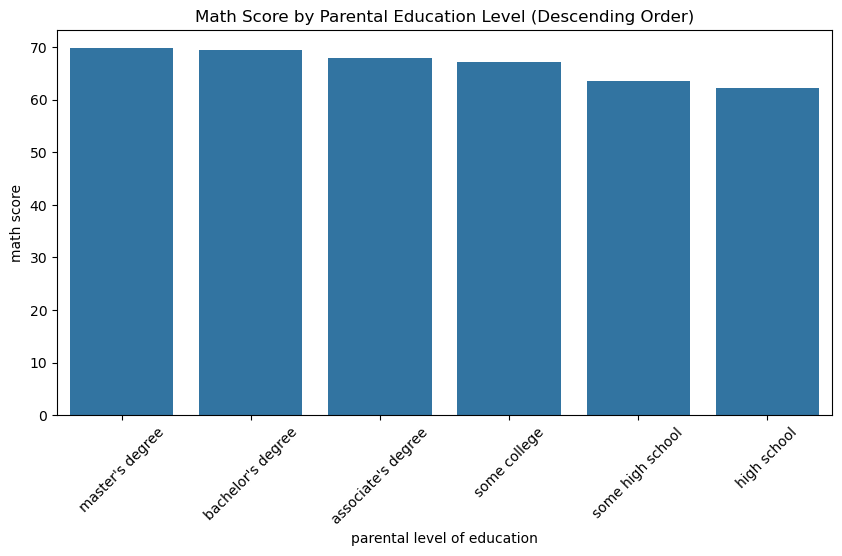

In [8]:
#✅ Sorted Bar Plot (Descending by Math Score)

import seaborn as sns
import matplotlib.pyplot as plt

# Group by education level and calculate the mean math score, then sort it
sorted_df = df.groupby('parental level of education', as_index=False)['math score'].mean().sort_values(by='math score', ascending=False)

# Plot using the sorted DataFrame
plt.figure(figsize=(10, 5))
sns.barplot(data=sorted_df, x='parental level of education', y='math score')
plt.xticks(rotation=45)
plt.title('Math Score by Parental Education Level (Descending Order)')
plt.show()


In [9]:
#so from above we understood the order of education 
# so now ,This helps a lot when plotting or modeling — it tells pandas/seaborn to treat the categories in that specific order.

import pandas as pd

education_order = [
    "master's degree", 
    "bachelor's degree", 
    "associate's degree", 
    "some college", 
    "high school"
]

df['parental level of education'] = pd.Categorical(
    df['parental level of education'],
    categories=education_order,
    ordered=True
)
#How to convert to category?
df['parental level of education'] = df['parental level of education'].cat.codes

df.dtypes


parental level of education      int8
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [10]:
df.head()

,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,standard,none,72,72,74
1,3,standard,completed,69,90,88
2,0,standard,none,90,95,93
3,2,free/reduced,none,47,57,44
4,3,standard,none,76,78,75


In [11]:
#now just like "parental level of education" lets work on "lunch"

In [12]:
print(df['lunch'].unique())

['standard' 'free/reduced']


In [13]:
# lets check whether score depends on lunch or not

print(df.groupby('lunch')[['math score', 'reading score', 'writing score']].mean())

              math score  reading score  writing score
lunch                                                 
free/reduced   58.921127      64.653521      63.022535
standard       70.034109      71.654264      70.823256


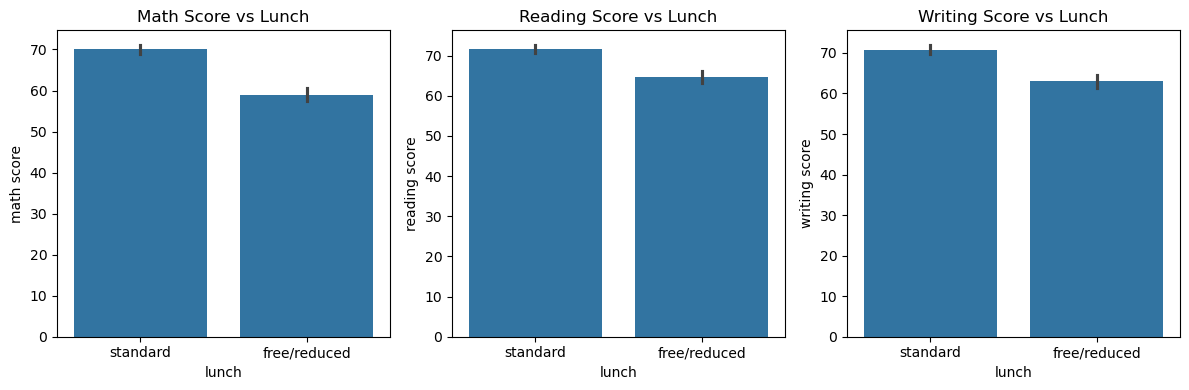

In [14]:
#yes absolutely score depends on lunch 
#lets plot it 
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Math Score vs Lunch
plt.subplot(1, 3, 1)
sns.barplot(data=df, x='lunch', y='math score')
plt.title('Math Score vs Lunch')

# Reading Score vs Lunch
plt.subplot(1, 3, 2)
sns.barplot(data=df, x='lunch', y='reading score')
plt.title('Reading Score vs Lunch')

# Writing Score vs Lunch
plt.subplot(1, 3, 3)
sns.barplot(data=df, x='lunch', y='writing score')
plt.title('Writing Score vs Lunch')

plt.tight_layout()
plt.show()

In [15]:
#✅ Label Encoding (Binary → 0 and 1)
'''This way:

standard lunch = 1 → possibly better nutrition = better performance

free/reduced = 0 → may represent disadvantaged background'''

#in previous 'parental level of education' we just assigned unique values but here in lunch we are using binary 0 and 1
#1 gets high value and 0 gets low  
#whatever we just converted

'This way:\n\nstandard lunch = 1 → possibly better nutrition = better performance\n\nfree/reduced = 0 → may represent disadvantaged background'

In [16]:
# Encoding lunch: standard = 1, free/reduced = 0
df['lunch'] = df['lunch'].map({
    'standard': 1,
    'free/reduced': 0
})

# Confirm the result
print(df[['lunch']].head())


   lunch
0      1
1      1
2      1
3      0
4      1


In [17]:
df.head()

,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,1,none,72,72,74
1,3,1,completed,69,90,88
2,0,1,none,90,95,93
3,2,0,none,47,57,44
4,3,1,none,76,78,75


In [18]:
#######################################################################################################
#in the same way lets go to test preparation course

In [19]:
print(df['test preparation course'].unique())

['none' 'completed']


In [20]:
print(df.groupby('test preparation course')[['math score', 'reading score', 'writing score']].mean())

                         math score  reading score  writing score
test preparation course                                          
completed                 69.695531      73.893855      74.418994
none                      64.077882      66.534268      64.504673


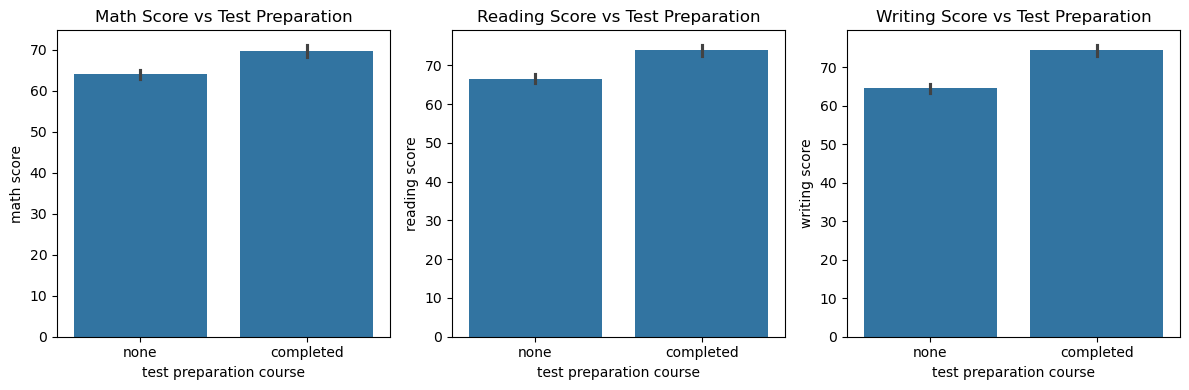

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Math Score
plt.subplot(1, 3, 1)
sns.barplot(data=df, x='test preparation course', y='math score')
plt.title('Math Score vs Test Preparation')

# Reading Score
plt.subplot(1, 3, 2)
sns.barplot(data=df, x='test preparation course', y='reading score')
plt.title('Reading Score vs Test Preparation')

# Writing Score
plt.subplot(1, 3, 3)
sns.barplot(data=df, x='test preparation course', y='writing score')
plt.title('Writing Score vs Test Preparation')

plt.tight_layout()
plt.show()

In [22]:
# Encode test preparation course
df['test preparation course'] = df['test preparation course'].map({
    'completed': 1,
    'none': 0
})

# Confirm result
print(df[['test preparation course']].head())


   test preparation course
0                        0
1                        1
2                        0
3                        0
4                        0


In [23]:
df.head()

,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,1,0,72,72,74
1,3,1,1,69,90,88
2,0,1,0,90,95,93
3,2,0,0,47,57,44
4,3,1,0,76,78,75


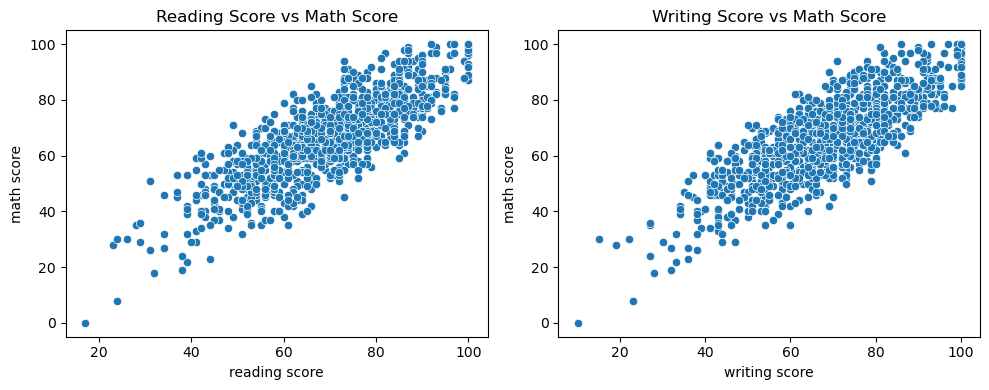

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))

# Reading vs Math
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='reading score', y='math score')
plt.title('Reading Score vs Math Score')

# Writing vs Math
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='writing score', y='math score')
plt.title('Writing Score vs Math Score')

plt.tight_layout()
plt.show()


In [25]:
# Step 2: Correlation Check

print(df[['math score', 'reading score', 'writing score']].corr())


               math score  reading score  writing score
math score       1.000000       0.817580       0.802642
reading score    0.817580       1.000000       0.954598
writing score    0.802642       0.954598       1.000000


In [26]:
'''Great question! Let’s break it down in a super simple way, like a smart friend explaining it at a chai break ☕️😄

---

### 🧠 What is Correlation?

**Correlation** tells you how **strongly two things are related.**

For example:

* When students read more, do they also score more in math?
* When writing scores go up, do math scores also go up?

📈 Correlation gives a number between **-1 and +1**:

| Correlation Value | Meaning                       |
| ----------------- | ----------------------------- |
| **+1**            | Perfect positive relationship |
| **0**             | No relationship               |
| **-1**            | Perfect negative relationship |

---

### 🧪 Example (from your dataset):

```python
print(df[['math score', 'reading score', 'writing score']].corr())
```

This will show something like:

```
                math score  reading score  writing score
math score         1.00         0.82            0.78
reading score      0.82         1.00            0.95
writing score      0.78         0.95            1.00
```

Now let's interpret 👇

* `math score` and `reading score` = **0.82** → **strong positive correlation**
* `math score` and `writing score` = **0.78** → also **strong**
* `reading` and `writing` = **0.95** → **very strongly related**

---

### 💡 What It Means:

* 🟢 Use reading/writing as input features because they help predict math score.
* ⚠️ Since reading & writing are almost twins (0.95), you **can** drop one if you're doing *simple* linear regression, but in most cases, it's fine to keep both.

---

### 📌 Summary:

| Check             | Why Do It?                          |
| ----------------- | ----------------------------------- |
| `.corr()`         | To find which features are useful   |
| Correlation > 0.7 | Good signal to **keep the feature** |
| Correlation \~ 0  | Feature is likely **not useful**    |

---
'''


"Great question! Let’s break it down in a super simple way, like a smart friend explaining it at a chai break ☕️😄\n\n---\n\n### 🧠 What is Correlation?\n\n**Correlation** tells you how **strongly two things are related.**\n\nFor example:\n\n* When students read more, do they also score more in math?\n* When writing scores go up, do math scores also go up?\n\n📈 Correlation gives a number between **-1 and +1**:\n\n| Correlation Value | Meaning                       |\n| ----------------- | ----------------------------- |\n| **+1**            | Perfect positive relationship |\n| **0**             | No relationship               |\n| **-1**            | Perfect negative relationship |\n\n---\n\n### 🧪 Example (from your dataset):\n\n```python\nprint(df[['math score', 'reading score', 'writing score']].corr())\n```\n\nThis will show something like:\n\n```\n                math score  reading score  writing score\nmath score         1.00         0.82            0.78\nreading score      0.82   

In [27]:
#✅ Step 1: Train-Test Split

from sklearn.model_selection import train_test_split

# Features and Target
X = df.drop('math score', axis=1)
y = df['math score']

# Split: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
#✅ Step 2: Feature Scaling (Optional for Linear Regression but Recommended)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Initialize the model
model = LinearRegression()

# 2. Train the model
model.fit(X_train_scaled, y_train)

# 3. Make predictions on test data
y_pred = model.predict(X_test_scaled)

# 4. Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 5. Print the results
print("📈 Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R² Score): {r2:.2f}")


📈 Model Evaluation:
Mean Absolute Error (MAE): 6.99
Mean Squared Error (MSE): 73.00
R-squared (R² Score): 0.70
